### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*data.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*item.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [5]:
# import datasets
data=pd.read_csv('Data (2).csv')
item=pd.read_csv('item.csv')
user=pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [10]:
#First Dataset (Data)
print('******info********')
print(data.info())  #10,000 entries
print('******shape********')
print(data.shape)
print('******describe********')
print(data.describe())
print('******null********')
print(data.isnull().sum())

******info********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
******shape********
(100000, 4)
******describe********
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.

# Observation 1
The timestamp is presented in a very strange time format. I will have some trouble transforming that into understandable information. 

In [790]:
# Inserted the missing_check function, from Great learning EDA videos
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
timestamp,0,0.0
rating,0,0.0
movie id,0,0.0
user id,0,0.0


In [11]:
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
data.tail() 

,user id,movie id,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


In [14]:
#Second Dataset (Item)

#1681 entries, 22 columns
# We have a categorical value that we might need to transform, note this is check all that apply. 
# One movie can have multiple gendres
print('******info********')
print(item.info())  #10,000 entries
print('******shape********')
print(item.shape)
print('******describe********')
print(item.describe())
print('******null********')
print(item.isnull().sum())

******info********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null  

In [797]:
missing_check(item)

,Total,Percent
Western,0,0.0
War,0,0.0
movie title,0,0.0
release date,0,0.0
unknown,0,0.0
Action,0,0.0
Adventure,0,0.0
Animation,0,0.0
Childrens,0,0.0
Comedy,0,0.0


In [15]:
item.head() 

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## Observation 2
There's a variable with the name "unknown" in the "item" dataset. This is not an error, its a gendre option. A good questions is why would a movie not fall under these categories? What is the information that we will get from unknown? Would it provide any managerialy actionable items to know the average rating for unknown gendre? I think that those movies need to be classified as much as possible.  

In [799]:
# Movies in unknown Gendre
unknown_gendre_movies = [item["unknown"]==1]

In [800]:
unknown_gendre_movies

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1676    False
 1677    False
 1678    False
 1679    False
 1680    False
 Name: unknown, Length: 1681, dtype: bool]

## Observation 3
It is strange that zip code is an object and not an integer. We expect numbers as zip code and not strings. I need to check how many of them can't be converted into a number since this is also missing data. I also can't see it Zip Code under the user.describe command. So apparently there is no missing values, but the unknown gendre category, format of timestamp, and the string values and invalid characters in zipcode will present missing data challenges. 

In [16]:
#Third Dataset (Item)
print('******info********')
print(user.info())  #10,000 entries
print('******shape********')
print(user.shape)
print('******describe********')
print(user.describe())
print('******null********')
print(user.isnull().sum())

******info********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
******shape********
(943, 5)
******describe********
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
******null********
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


In [805]:
missing_check(user)

,Total,Percent
zip code,0,0.0
occupation,0,0.0
gender,0,0.0
age,0,0.0
user id,0,0.0


In [806]:
# What isnull() function recognises as missing value

pd.DataFrame({'value' : user['zip code'], 'Missing?' : user['zip code'].isnull()}) 

,value,Missing?
0,85711,False
1,94043,False
2,32067,False
3,43537,False
4,15213,False
...,...,...
938,33319,False
939,02215,False
940,97229,False
941,78209,False


In [807]:
len(user)

943

In [17]:
user.head() 

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [18]:
user.tail()

,user id,age,gender,occupation,zip code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


**Observations:**



### 4. Find the number of movies per genre using the item data - 2.5 marks

In [25]:
item.sum()  #unknown has only 1 movie.

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

**Insights:**



### 5. Drop the movie where the genre is unknown - 2.5 marks

In [27]:
# what is the unkown movie??
unknown_movie_gendre = item[item['unknown'] == 1]
unknown_movie_gendre  # Good morning, 1971

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
item['unknown'].value_counts()

0    1680
1       1
Name: unknown, dtype: int64

In [30]:
# Dropping unknown movie gendre from the dataset
item.drop(item[item['unknown'] == 1].index, inplace=True) 
#Also this works--> item=item[item['unknown']!=1]

In [31]:
item['unknown'].value_counts()

0    1680
Name: unknown, dtype: int64

In [32]:
item.sum()

movie id                                                  1413763
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         0
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

**Insights:**
I looked for the movie and it seems hard to classify per the movie description in IMDB. It might be a comedy based on the description: 

"A man wakes up hoping to have a good day, but reality keeps getting in the way."

There is a user review which tells me it's a comedy:

I saw this short film in1973. It was a comedic Look at Los Angeles life during Vietnam. I can't remember the details but my overall reaction was that it was "roll on the floor funny." It did reflect 1971 quite well. I would buy a copy if it were available on DVD.

It did not win an Oscar that year. I did not see all the competition for that year but this one sticks in my mind as worthy of one.

Ken Greenwald is a very talented young man. I also recall him as an actor in a car rotary engine commercial. Regretfully,, he did not produce another film until about 2006.
https://www.imdb.com/title/tt0067152/

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [815]:
# Create the Sum column for Gendres
list_of_gendres = ['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir', 'Horror', 'Musical','Mystery','Romance','Sci-Fi', 'Thriller', 'War', 'Western']
item['Sum'] = item[list_of_gendres].sum(axis=1)
# this also works to create a sum: new_item['Number of Genres']=item.loc[:,'Action':'Western'].sum(axis=1)
item_over1 = item.drop(['release date','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir', 'Horror', 'Musical','Mystery','Romance','Sci-Fi', 'Thriller', 'War', 'Western'],axis=1)
item_over1

,movie id,movie title,Sum
0,1,Toy Story,3
1,2,GoldenEye,3
2,3,Four Rooms,1
3,4,Get Shorty,3
4,5,Copycat,3
...,...,...,...
1676,1678,Mat' i syn,1
1677,1679,B. Monkey,2
1678,1680,Sliding Doors,2
1679,1681,You So Crazy,1


In [816]:
# Dropping the movies with only one gendre          item_over1=item.drop(item[item_over1['Sum'] == 1].index, inplace=True)
item_over1=item_over1.drop(item_over1[item_over1['Sum'] == 1].index)

In [817]:
# Printing list of movies with over one gendre #item_over1=item[['movie id', 'movie title', 'Sum']]
item_over1

,movie id,movie title,Sum
0,1,Toy Story,3
1,2,GoldenEye,3
3,4,Get Shorty,3
4,5,Copycat,3
6,7,Twelve Monkeys,2
...,...,...,...
1667,1669,MURDER and murder,3
1668,1670,Tainted,2
1671,1673,Mirage,2
1677,1679,B. Monkey,2


In [818]:
print('Number of Movies with over 1 Gendre',item_over1['Sum'].count())
print('Total Number of movies            ',item['Sum'].count())
print('Percentage of Movies with over 1 Gendre', item_over1['Sum'].count()/item['Sum'].count())

Number of Movies with over 1 Gendre 849
Total Number of movies             1680
Percentage of Movies with over 1 Gendre 0.5053571428571428


**Insights:**
There are 850 movies that have more than one gendre. This is equivalent to half of the movies.

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [819]:
#'rating'-->data, 'Age'-->user, 'release year'-->item, 'Gender'-->user and 'Occupation'-->user
item['release date'].tail()

1676    06-Feb-1998
1677    06-Feb-1998
1678    01-Jan-1998
1679    01-Jan-1994
1680    08-Mar-1996
Name: release date, dtype: object

In [820]:
#a = 'My*cat*is*brown'
#print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

#print(a[10:])
#print(a[-5:])

# Tried to use split, but I couldn't add it to the dataframe
#result['date_split'] = result["release date"].str.split("-", n=3, expand=True)

In [821]:
# import datetime class from datetime module
# Code from stack overflow: https://www.interviewqs.com/ddi-code-snippets/extract-month-year-pandas

from datetime import datetime

# Create the Year value
item['release year'] = pd.DatetimeIndex(item['release date']).year
item.tail()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Sum,release year
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1998
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,2,1998
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,1998
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1994
1680,1682,Scream of Stone (Schrei aus Stein),08-Mar-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1996


In [822]:
#result['release year']= str(result['release year']).split('.')
#result['release year'].round(0)
#result.style.format({
 #   'release year': '{:,.0f}'.format})

In [823]:
item['release year'].describe()

count    1680.000000
mean     1989.397024
std        14.250757
min      1922.000000
25%      1993.000000
50%      1995.000000
75%      1996.000000
max      1998.000000
Name: release year, dtype: float64

In [824]:
item['release year'].isnull().sum()

0

In [825]:
missing_check(item)

,Total,Percent
release year,0,0.0
Sum,0,0.0
movie title,0,0.0
release date,0,0.0
unknown,0,0.0
Action,0,0.0
Adventure,0,0.0
Animation,0,0.0
Childrens,0,0.0
Comedy,0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


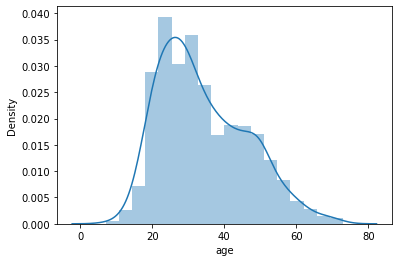

In [873]:
sns.distplot(user['age'])
plt.show() 

In [875]:
user['age'].median()

31.0

In [877]:
user['age'].mean()

34.05196182396607

In [878]:
user['age'].mode()

0    30
dtype: int64

The age distribution is clearly positively skewed since the mean is greater than the median. This means that there are some observations of large age values, but most user ages fall on small age values (from 20 to 40). Note that there are two modes, making our graph look like a roller coaster. We also have a smaller hill in the distribution for the group of users with ages 40 to 60.

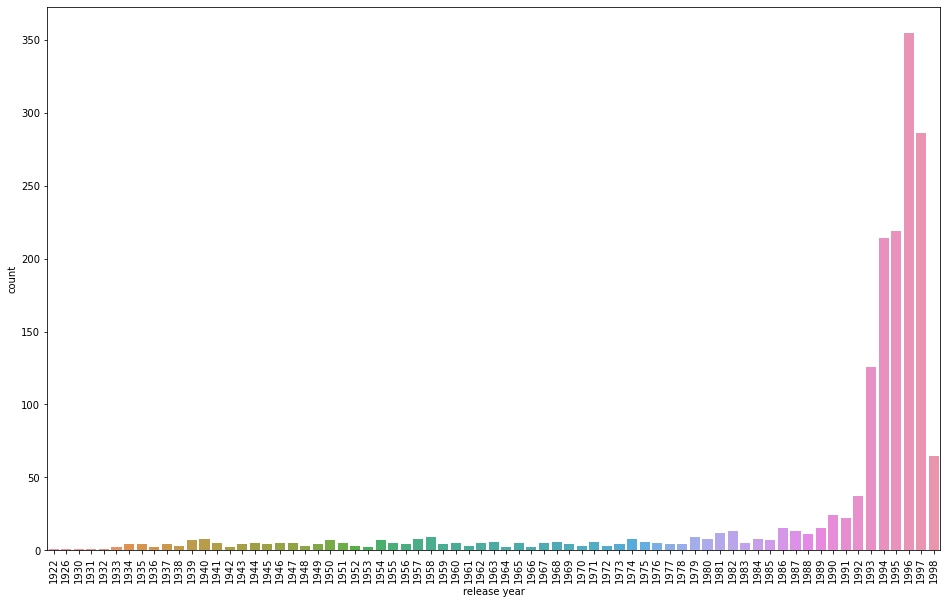

In [827]:
# Chart showing Release Year movie counts, most data was recorded after 1992
fig, ax = plt.subplots(figsize=(16,10))   # setting the figure size of the plot
chart = sns.countplot(x="release year", data=item)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

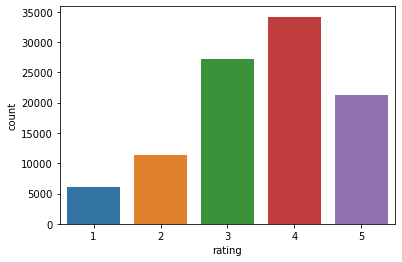

In [864]:
#Chart showing ratings
chart = sns.countplot(x="rating", data=data)
plt.show()

In [866]:
data['rating'].mode()

0    4
dtype: int64

In [870]:
data['rating'].mean()

3.52986

In [871]:
data['rating'].median()

4.0

We see a more or less normal distribution, which is skewed to the left, since there are low values on the tail of the distribution. Most rated the movies well. Also the median is greater than the mean, this indicates a negative skew, confirming the left skewness.

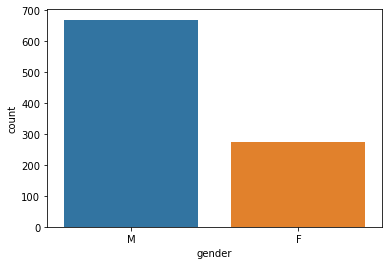

In [862]:
#Chart showing gender, mostly men
chart = sns.countplot(x="gender", data=user)
plt.show()

This distribution might be problematic if we compared Gender without taking into account the proportion of men vs women in the user dataset, user id list. There was about 3 men for every women in our dataset.

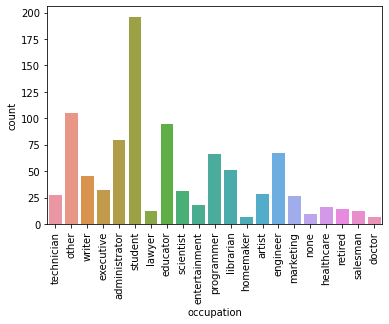

In [861]:
#Chart showing occupation, mostly students
chart = sns.countplot(x="occupation", data=user)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

The most common user occupation is student, followed by educator. It does make one wonder whether there's a lot of movie viewership based on school programs.

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [831]:
item2 = item.drop(['release date','Sum','movie id','movie title'],axis=1)

item2=pd.melt(item2, id_vars=['release year'], var_name='gendre', value_name='value') #https://stackoverflow.com/questions/23354124/how-can-i-unpivot-specific-columns-from-a-pandas-dataframe

item2.tail()

,release year,gendre,value
31915,1998,Western,0
31916,1998,Western,0
31917,1998,Western,0
31918,1994,Western,0
31919,1996,Western,0


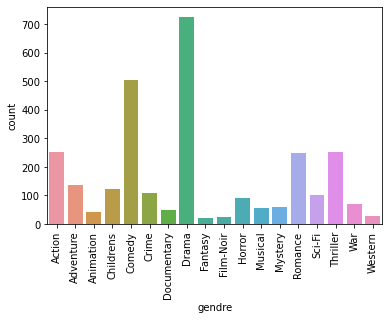

In [860]:
#Chart showing occupation, mostly students
chart = sns.countplot(x="gendre", data=item3)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

Most movie ids are for to Drama, Commedy, Romance, Thriller, and Action. Drama is the gendre type that has the most movies in the dataset.

In [833]:
#Gendres_by_Year = [item2["value"]==0]
item3=item2.drop(item2[item2['value'] == 0].index)
item3

,release year,gendre,value
1681,1995,Action,1
1683,1995,Action,1
1696,1996,Action,1
1700,1996,Action,1
1701,1996,Action,1
...,...,...,...
31426,1990,Western,1
31485,1994,Western,1
31691,1947,Western,1
31692,1943,Western,1


In [834]:
#https://stackoverflow.com/questions/54891798/how-to-calculate-sum-of-a-column-based-on-two-conditions-in-python
item4=item3.groupby(['release year','gendre'])['value'].sum()
item4=item4.unstack(level=0)         
item4

release year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
gendre,,,,,,,,,,,,,,,,,,,,,
Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,7.0,2.0,8.0,20.0,30.0,40.0,44.0,46.0,12.0
Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,1.0,1.0,1.0,9.0,13.0,22.0,24.0,20.0,3.0
Animation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,2.0,1.0,4.0,6.0,9.0,3.0,NaN
Childrens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,1.0,1.0,6.0,15.0,21.0,21.0,22.0,1.0
Comedy,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,1.0,2.0,...,3.0,6.0,6.0,12.0,39.0,82.0,63.0,108.0,87.0,13.0
Crime,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,NaN,5.0,7.0,8.0,11.0,21.0,30.0,7.0
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,4.0,9.0,5.0,18.0,6.0,3.0
Drama,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,...,8.0,12.0,11.0,14.0,64.0,97.0,89.0,170.0,113.0,33.0
Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,3.0,3.0,6.0,4.0,1.0


In [835]:
# Used this code from stack overflow instead of the recommended sum axis=1. This is due to the nature of my data, which is already in matrix format. 
# https://stackoverflow.com/questions/45591918/python-pandas-convert-column-to-percentage-on-groupby-df
item5=(100. * item4 / item4.sum()).round(0)
item5

release year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
gendre,,,,,,,,,,,,,,,,,,,,,
Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,16.0,6.0,12.0,9.0,8.0,10.0,8.0,9.0,10.0
Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,2.0,3.0,1.0,4.0,4.0,6.0,4.0,4.0,3.0
Animation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,3.0,3.0,0.0,1.0,2.0,2.0,1.0,NaN
Childrens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,2.0,3.0,1.0,3.0,4.0,6.0,4.0,4.0,1.0
Comedy,NaN,NaN,NaN,NaN,NaN,33.0,33.0,33.0,50.0,20.0,...,10.0,14.0,17.0,17.0,18.0,23.0,17.0,19.0,18.0,11.0
Crime,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,7.0,NaN,7.0,3.0,2.0,3.0,4.0,6.0,6.0
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,3.0,NaN,2.0,3.0,1.0,3.0,1.0,3.0
Drama,NaN,100.0,100.0,NaN,NaN,NaN,17.0,NaN,50.0,10.0,...,28.0,27.0,31.0,20.0,30.0,27.0,23.0,30.0,23.0,28.0
Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0


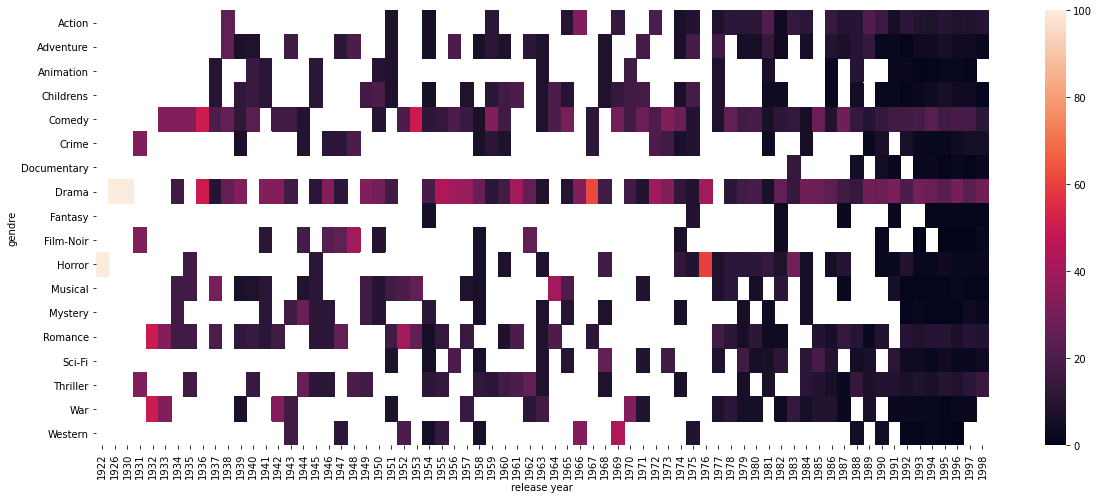

In [836]:
#Heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(item5)
plt.show()

**Insights:**

It looks like drama has always been a popular gendre this explains its high count in the dataset and data spread in the heatmap showing presense in most years. Documentary seems a very new type of gendre first seen in the 80's, and Western has been popular on and off through the last 80 years. Most movies are well represented in the 90's so this might just mean that we have more complete samples for those years, it would not necessarilly mean there are production trends. There is a pronounced skewness in the countplot, which shows a type of distribution with a pronounce tail to the left.

Most user's occupation is student, this might be driving the users age as well. Most users were in their 20's and 30's.


### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [837]:
data.tail()

,user id,movie id,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


In [838]:
data['rating'].isnull().sum()

0

In [847]:
# First isolated only the relevant variables
data2 = data[['movie id','rating']]

# Make a new column with if condition 

# This works, but its difficult to transform:
#data3['decision'] = np.where(data2.groupby(['movie id']).agg('count')  > 100, 'keep', 'delete')
# Drop values below 100
#data4=data3.drop(data3[data3['decision'] == 'delete'].index)
##df2= data4.merge(data4, left_on='key', right_index=True)
# https://stackoverflow.com/questions/46777564/python-pandas-if-statement-based-on-group-by-sum

In [848]:
#1 Tranform Groupby onto a dataframe
data2 = data[['movie id','rating']]

In [849]:
# Group by data transformation, "agg" brings in the mean and sum 
# Code for "agg" function from https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
data2=data2.groupby('movie id').agg(['mean','sum'])
data2
# Code from video tutorial in https://www.youtube.com/watch?v=jcbRt3RWcGI

rating      
              mean   sum
movie id                
1         3.878319  1753
2         3.206107   420
3         3.033333   273
4         3.550239   742
5         3.302326   284
...            ...   ...
1678      1.000000     1
1679      3.000000     3
1680      2.000000     2
1681      3.000000     3
1682      3.000000     3

[1682 rows x 2 columns]

In [850]:
# Transform Groupby object into a dataframe
data2=data2.transform('rating')
data2

,mean,sum
movie id,,
1,3.878319,1753
2,3.206107,420
3,3.033333,273
4,3.550239,742
5,3.302326,284
...,...,...
1678,1.000000,1
1679,3.000000,3
1680,2.000000,2


In [851]:
# Make movie id a variable, not the index
data2=data2.reset_index()

# Rename variables so that they don't get confused with functions
data2=data2.rename(columns={"sum": "Count", "mean": "Mean"})
data2

,movie id,Mean,Count
0,1,3.878319,1753
1,2,3.206107,420
2,3,3.033333,273
3,4,3.550239,742
4,5,3.302326,284
...,...,...,...
1677,1678,1.000000,1
1678,1679,3.000000,3
1679,1680,2.000000,2
1680,1681,3.000000,3


In [853]:
# Drop movies rated less than 100 occasions
data2=data2.drop(data2[data2['Count'] < 100].index)
data2

,movie id,Mean,Count
0,1,3.878319,1753
1,2,3.206107,420
2,3,3.033333,273
3,4,3.550239,742
4,5,3.302326,284
...,...,...,...
1219,1220,3.333333,100
1220,1221,3.487179,136
1225,1226,3.375000,108
1227,1228,2.458333,118


In [854]:
data2.describe()

,movie id,Mean,Count
count,771.000000,771.000000,771.000000
mean,484.696498,3.478284,422.832685
std,314.137039,0.472086,350.738833
min,1.000000,2.157895,100.000000
25%,215.500000,3.149955,172.000000
50%,462.000000,3.513333,290.000000
75%,714.000000,3.836237,551.000000
max,1244.000000,4.491071,2541.000000


In [855]:
# Sort values based on mean, inplace=True makes the sorting permanent
data2.sort_values(by=['Mean'], ascending=False, inplace=True)
data2

,movie id,Mean,Count
407,408,4.491071,503
317,318,4.466443,1331
168,169,4.466102,527
482,483,4.456790,1083
113,114,4.447761,298
...,...,...,...
1078,1079,2.244444,101
119,120,2.238806,150
686,687,2.188406,151
947,948,2.166667,104


In [856]:
# Get the top 25 best rated movie ids, we still need to know what are the titles to respond to the question
data2=data2.head(25)
data2

,movie id,Mean,Count
407,408,4.491071,503
317,318,4.466443,1331
168,169,4.466102,527
482,483,4.456790,1083
113,114,4.447761,298
63,64,4.445230,1258
602,603,4.387560,917
11,12,4.385768,1171
49,50,4.358491,2541
177,178,4.344000,543


In [859]:
data2 = pd.merge(data2, item, how="left", on=["movie id"])
data2 = data2[['movie title','Mean','Count']]
data2

,movie title,Mean,Count
0,"Close Shave, A",4.491071,503
1,Schindler's List,4.466443,1331
2,"Wrong Trousers, The",4.466102,527
3,Casablanca,4.456790,1083
4,Wallace & Gromit: The Best of Aardman Animation,4.447761,298
5,"Shawshank Redemption, The",4.445230,1258
6,Rear Window,4.387560,917
7,"Usual Suspects, The",4.385768,1171
8,Star Wars,4.358491,2541
9,12 Angry Men,4.344000,543


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [768]:
# 1. Merge all the datasets

#your code here# Merge datasets to Data using user id and movie id
#'rating'-->data, 'Age'-->user, 'release year'-->item, 'Gender'-->user and 'Occupation'-->user
merge_1 = pd.merge(data, user, how="left", on=["user id"])
merge_2 = pd.merge(merge_1, item, how="left", on=["movie id"])
merge_2.head()

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Sum,release year
0,196,242,3,881250949,49,M,writer,55105,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997.0
1,186,302,3,891717742,39,F,executive,00000,L.A. Confidential,01-Jan-1997,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,1997.0
2,22,377,1,878887116,25,M,writer,40206,Heavyweights,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1994.0
3,244,51,2,880606923,28,M,technician,80525,Legends of the Fall,01-Jan-1994,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,1994.0
4,166,346,1,886397596,47,M,educator,55113,Jackie Brown,01-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1997.0


In [769]:
# * Men watch more drama than women
# * Women watch more Sci-Fi than men
# * Men watch more Romance than women
# 3. you might want ot use the .sum(), .div() function here.
# 4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 
#    3000 are for drama, we will assume that 75% of the women watch drama.

In [770]:
# Isolate only the relevant variables (Drama and Gender)
gender_drama= merge_2[['gender','Drama']]
gender_drama

# Remove zero values
gender_drama=gender_drama.drop(gender_drama[gender_drama['Drama'] == 0].index)
gender_d=gender_drama.groupby('gender').sum()
gender_d

,Drama
gender,
F,11008.0
M,28887.0


In [771]:
# Convert Drama counts into percentages
gender_d=(100. * gender_d / gender_d.sum()).round(0)
gender_d

,Drama
gender,
F,28.0
M,72.0


In [772]:
# Isolate only the relevant variables (Gender and Sci-Fi)
gender_Sci_Fi= merge_2[['gender','Sci-Fi']]
gender_Sci_Fi

# Remove zero values
gender_Sci_Fi=gender_Sci_Fi.drop(gender_Sci_Fi[gender_Sci_Fi['Sci-Fi'] == 0].index)
gender_Sci_Fi=gender_Sci_Fi.groupby('gender').sum()
gender_Sci_Fi

,Sci-Fi
gender,
F,2629.0
M,10101.0


In [773]:
# Convert Drama counts into percentages
gender_SF=(100. * gender_Sci_Fi / gender_Sci_Fi.sum()).round(0)
gender_SF

,Sci-Fi
gender,
F,21.0
M,79.0


In [774]:
# Isolate only the relevant variables (Gender and Sci-Fi)
gender_Rom= merge_2[['gender','Romance']]
gender_Rom

# Remove zero values
gender_Rom=gender_Rom.drop(gender_Rom[gender_Rom['Romance'] == 0].index)
gender_Rom=gender_Rom.groupby('gender').sum()
gender_Rom

,Romance
gender,
F,5858.0
M,13603.0


In [775]:
# Convert Drama counts into percentages
gender_R=(100. * gender_Rom / gender_Rom.sum()).round(0)
gender_R

,Romance
gender,
F,30.0
M,70.0


In [776]:
# 4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 
#    3000 are for drama, we will assume that 75% of the women watch drama.

# Drop every variable but gender  and gendre types, I had a sum that I did on item at the beginning of the project...
# I am using the sum as my row total, in order to simplify formulas
merge_3 = merge_2.drop(['release year', 'rating', 'movie title', 'zip code', 'release date', 'occupation', 'user id', 'movie id', 'timestamp', 'age'],axis=1)
merge_3.head()

,gender,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Sum
0,M,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,F,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0
2,M,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0
4,M,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [777]:
# Group by Gender and add eveything up
merge_4=merge_3.groupby('gender').sum()
merge_4

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Sum
gender,,,,,,,,,,,,,,,,,,,,
F,0.0,5442.0,3141.0,995.0,2232.0,8068.0,1794.0,187.0,11008.0,363.0,385.0,1197.0,1442.0,1314.0,5858.0,2629.0,5086.0,2189.0,371.0,53701.0
M,0.0,20147.0,10612.0,2610.0,4950.0,21764.0,6261.0,571.0,28887.0,989.0,1348.0,4120.0,3512.0,3931.0,13603.0,10101.0,16786.0,7209.0,1483.0,158884.0


In [778]:
# Give me the same group by table in percentage values
merge_5=merge_4[['Drama','Sci-Fi','Romance', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary','Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Thriller', 'War', 'Western', 'Sum']].div(merge_4['Sum'], axis=0)
merge_5

# Used code from Stack overflow to divide my sum amount by each gendre. The sum amount was calculated in previous steps
# https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value

,Drama,Sci-Fi,Romance,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Fantasy,Film-Noir,Horror,Musical,Mystery,Thriller,War,Western,Sum
gender,,,,,,,,,,,,,,,,,,,
F,0.204987,0.048956,0.109085,0.101339,0.058491,0.018529,0.041563,0.150239,0.033407,0.003482,0.006760,0.007169,0.022290,0.026852,0.024469,0.094710,0.040763,0.006909,1.0
M,0.181812,0.063575,0.085616,0.126803,0.066791,0.016427,0.031155,0.136980,0.039406,0.003594,0.006225,0.008484,0.025931,0.022104,0.024741,0.105649,0.045373,0.009334,1.0


**Conclusion:**

The data is misleading if the disproportionate rating by gender count is not considered. Men outnumber women almost 3 to 1 in our sample. We need to consider how many women left ratings for each gendre type and compare it to the total number of women who left a rating to be able to calculate the proportion of women that left a rating for each gendre type compared to the total population of women in the sample. 

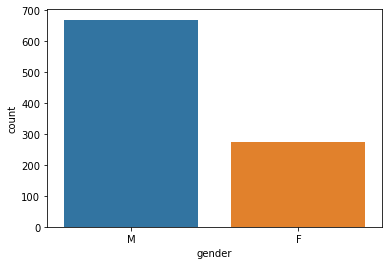

In [779]:
#Chart showing gender, mostly men
chart = sns.countplot(x="gender", data=user)
plt.show()

When we compare the proportions it normalizes the dataset. It's clear since now we see percentages that make more sense. We are going to focus only on the percentages since the instruction is "There is no need to conduct statistical tests around this. Just compare the percentages". If A is larger than B, then Valid. It doesn't matter if its .01% larger.

#### In brief only one of the statements is true:

* Men watch more drama than women  -->   VALID

About 20% of all the women in the sample rated Drama movies, while 18% for men. However we can tell that women and men watch about the same amount of drama movies, since this might not be of even more than 1 std. devaiation in each dataset. 

* Women watch more Sci-Fi than men -->   NOT VALID

About . 05% of women rated Sci-Fi movies, while .06% of man did the same out of the total of men and women that rated mvoies, man watched proportionally more Sci-Fi than women. Men tend to prefer Sci-Fi movies significantly more than women(it looks like a difference of at least one standard deviations without doing the calculation, a std. deviation would answer whether its significant, or an ANOVA). With this said the percentage is so tiny that the difference might quickly change. The dataset is robust, so the percentages shouldn't be taken as lightly. We are talking about 2,629 women and 10101 who left a rating for Sci Fi. 

* Men watch more Romance than women -->  NOT VALID

About 11% of females, and 9% of males watched Romance movies, so women do watch more. Men and women watch about the same amount of Romance movies. Women watch slightly more, but the difference might not reach one standard deviation(I haven't done std. deviation calculation for this either).

#### Proportions (Gendre Type as a percentage of Total Ratings left by Women)

In [879]:
# 1 - Proportions

merge_5[['Drama','Sci-Fi','Romance','Sum']]

,Drama,Sci-Fi,Romance,Sum
gender,,,,
F,0.204987,0.048956,0.109085,1.0
M,0.181812,0.063575,0.085616,1.0


In [880]:
# Count of Proportions
merge_4[['Drama','Sci-Fi','Romance','Sum']]

,Drama,Sci-Fi,Romance,Sum
gender,,,,
F,11008.0,2629.0,5858.0,53701.0
M,28887.0,10101.0,13603.0,158884.0


#### Total Rating Count by Gendre ( 70% men, 30% Women)

In [781]:
# Convert Drama counts into percentages
gender_d=(100. * gender_d / gender_d.sum()).round(0)
gender_d

,Drama
gender,
F,28.0
M,72.0


In [782]:
# Convert Drama counts into percentages
gender_SF=(100. * gender_Sci_Fi / gender_Sci_Fi.sum()).round(0)
gender_SF

,Sci-Fi
gender,
F,21.0
M,79.0


In [700]:
# Convert Drama counts into percentages
gender_R=(100. * gender_Rom / gender_Rom.sum()).round(0)
gender_R

,Romance
gender,
F,30.0
M,70.0
